In [8]:
# Data processing
import numpy as np
import xarray as xr
from pathlib import Path
# Visualization
import matplotlib as mpl
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default'] = 'regular'
publish = True
if publish:
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['axes.titlesize'] = 22
    mpl.rcParams['axes.labelsize'] = 20
    plt.rcParams['font.size'] = 16
path_to_figs = Path.cwd().parent.parent.parent.parent.parent.parent.parent / 'results' / 'misc'

In [2]:
path_to_atom = Path('../../../../../../../obs/ATom/nc/data')
# Select flights
fname_atom_flight_1607 = 'MER-WAS_DC8_20160729_R14.nc'
fname_atom_flight_1608 = 'MER-WAS_DC8_201608*.nc'
fname_atom_flight_1701 = 'MER-WAS_DC8_201701*.nc'
fname_atom_flight_1702 = 'MER-WAS_DC8_201702*.nc'
# Read ATom data
atom_dsmms_1607 = xr.open_dataset(path_to_atom / fname_atom_flight_1607, group='MMS', decode_cf=True)
atom_dsmms_1608 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1608)), group='MMS', decode_cf=True)
atom_dsmms_1701 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1701)), group='MMS', decode_cf=True)
atom_dsmms_1702 = xr.open_mfdataset(sorted(path_to_atom.glob(fname_atom_flight_1702)), group='MMS', decode_cf=True)

/local/mwe14avu/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/local/mwe14avu/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  coords=coords)


In [3]:
# Extract spatial coordinates from ATom data
sample_lats_1607 = np.asarray(atom_dsmms_1607.G_LAT.data) 
sample_lons_1607 = np.asarray(atom_dsmms_1607.G_LONG.data)
sample_lats_1608 = np.asarray(atom_dsmms_1608.G_LAT.data) 
sample_lons_1608 = np.asarray(atom_dsmms_1608.G_LONG.data)
sample_lats_1701 = np.asarray(atom_dsmms_1701.G_LAT.data) 
sample_lons_1701 = np.asarray(atom_dsmms_1701.G_LONG.data)
sample_lats_1702 = np.asarray(atom_dsmms_1702.G_LAT.data) 
sample_lons_1702 = np.asarray(atom_dsmms_1702.G_LONG.data)

In [4]:
# print(sample_lons_1608[540], sample_lats_1608[540])
# print(sample_lons_1608[541], sample_lats_1608[541])
# print(sample_lons_1608[542], sample_lats_1608[542])

In [5]:
# Exclude one data point that seems to be out of place
sample_lons_1608[541], sample_lats_1608[541] = None, None

In [14]:
atom_stops = [dict(name='Palmdale', lon=-118.100556, lat=34.581111),
              dict(name='Anchorage', lon=-149.9, lat=61.216667),
              dict(name='Kona', lon=-155.994167, lat=19.65),
              dict(name='Nadi', lat=-17.8, lon=177.416667),
              dict(name='Pago Pago/Tafuna', lon=-170.700556, lat=-14.279444),
#               dict(name='Tafuna', lon=-170.72, lat=-14.335833),
              dict(name='Christchurch', lon=172.620278, lat=-43.53),
              dict(name='Punta Arenas', lon=-70.933333, lat=-53.166667),
              dict(name='Ascension', lon=-14.366667, lat=-7.933333),
              dict(name='Azores', lon=-25.675556, lat=37.741111),
              dict(name='Kangerlussuaq', lon=-50.689167, lat=67.008611),
              dict(name='Minneapolis', lat=44.983333, lon=-93.266667),
              dict(name='Thule', lon=-69.230556, lat=77.466667)]
atom_stops_plt_kwargs = dict(transform=ccrs.PlateCarree(), color='w', marker='o', markeredgecolor='k')
atom_stops_txt_kwargs = dict(transform=ccrs.PlateCarree(), color='k', fontsize=14)

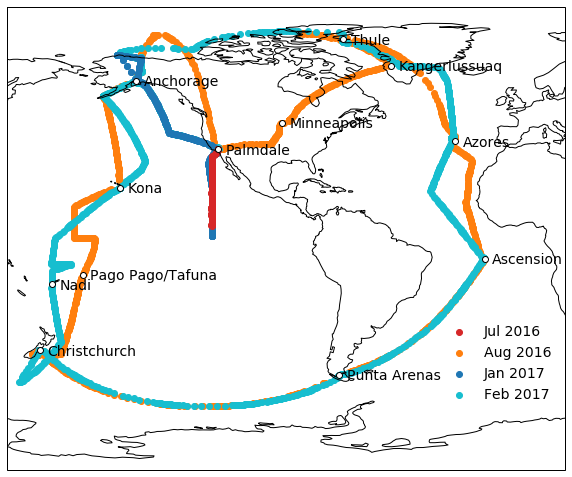

In [24]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=-120)), facecolor='w')
ax.scatter(sample_lons_1607, sample_lats_1607, transform=ccrs.PlateCarree(), color='C3', marker='o', label='Jul 2016')
ax.scatter(sample_lons_1608, sample_lats_1608, transform=ccrs.PlateCarree(), color='C1', marker='o', label='Aug 2016')
ax.scatter(sample_lons_1701, sample_lats_1701, transform=ccrs.PlateCarree(), color='C0', marker='o', label='Jan 2017')
ax.scatter(sample_lons_1702, sample_lats_1702, transform=ccrs.PlateCarree(), color='C9', marker='o', label='Feb 2017')
ax.scatter(sample_lons_1701, sample_lats_1701, transform=ccrs.PlateCarree(), color='C0', marker='o')
ax.scatter(sample_lons_1607, sample_lats_1607, transform=ccrs.PlateCarree(), color='C3', marker='o')
ax.coastlines()
ax.set_extent([-200, 17, -90, 90], crs=ccrs.PlateCarree())
ax.legend(loc='center', bbox_to_anchor=(0.88,0.23), frameon=False, fontsize=14)
for i in atom_stops:
    ax.plot(i['lon'], i['lat'], **atom_stops_plt_kwargs)
    ax.text(i['lon']+3, i['lat']-2, i['name'], **atom_stops_txt_kwargs)
# fig.savefig(path_to_figs / f'atom_flight_tracks.png', bbox_inches='tight', dpi=300)